In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser


In [18]:
dataset=pd.read_csv(r'C:\Users\453845\Desktop\Python_anu\P39-CS3\appdata10.csv')

In [19]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

In [20]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [21]:
dataset2=dataset.drop(columns=['user','first_open','screen_list','enrolled_date'])

In [23]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


In [25]:
dataset2.isna().any()

dayofweek               False
hour                    False
age                     False
numscreens              False
minigame                False
used_premium_feature    False
enrolled                False
liked                   False
dtype: bool

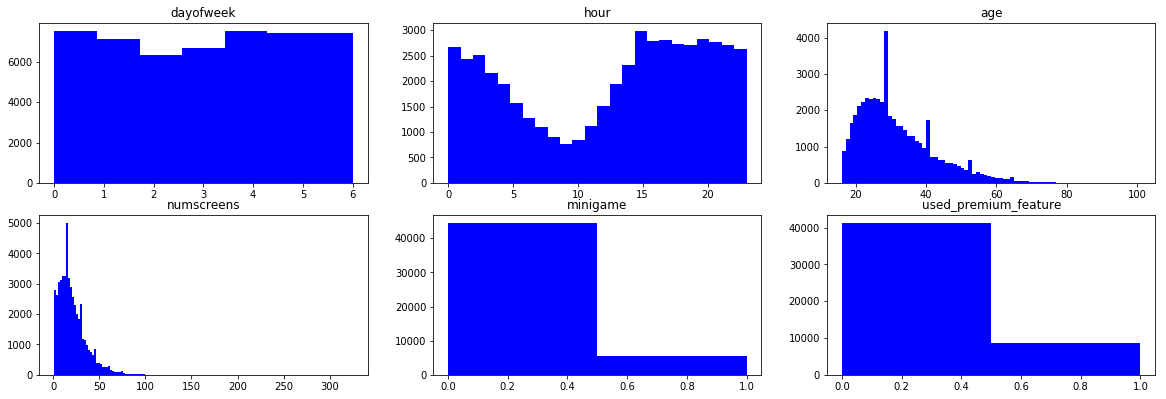

In [27]:
figure=plt.figure(figsize=(20,10))
for i in range(1,dataset2.shape[1]-1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    vals=np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='b')

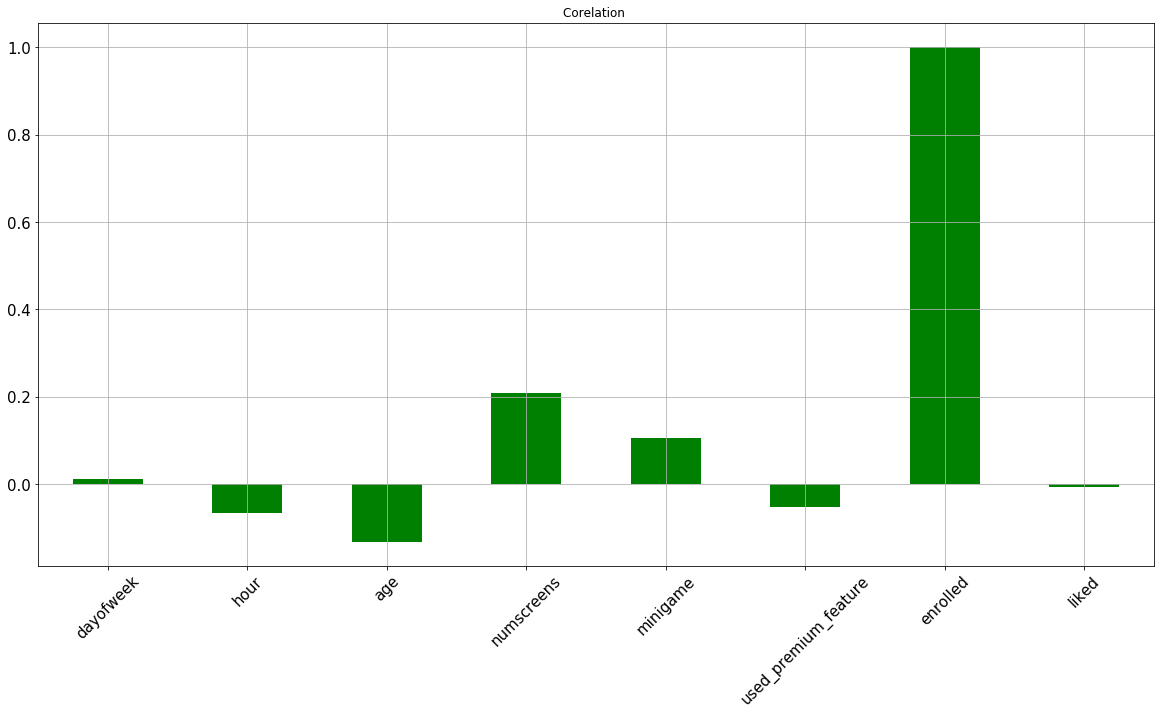

In [30]:
dataset2.corrwith(dataset2.enrolled).plot(kind='bar',figsize=(20,10),title='Corelation ',grid=True,fontsize=15,rot=45,color='g')

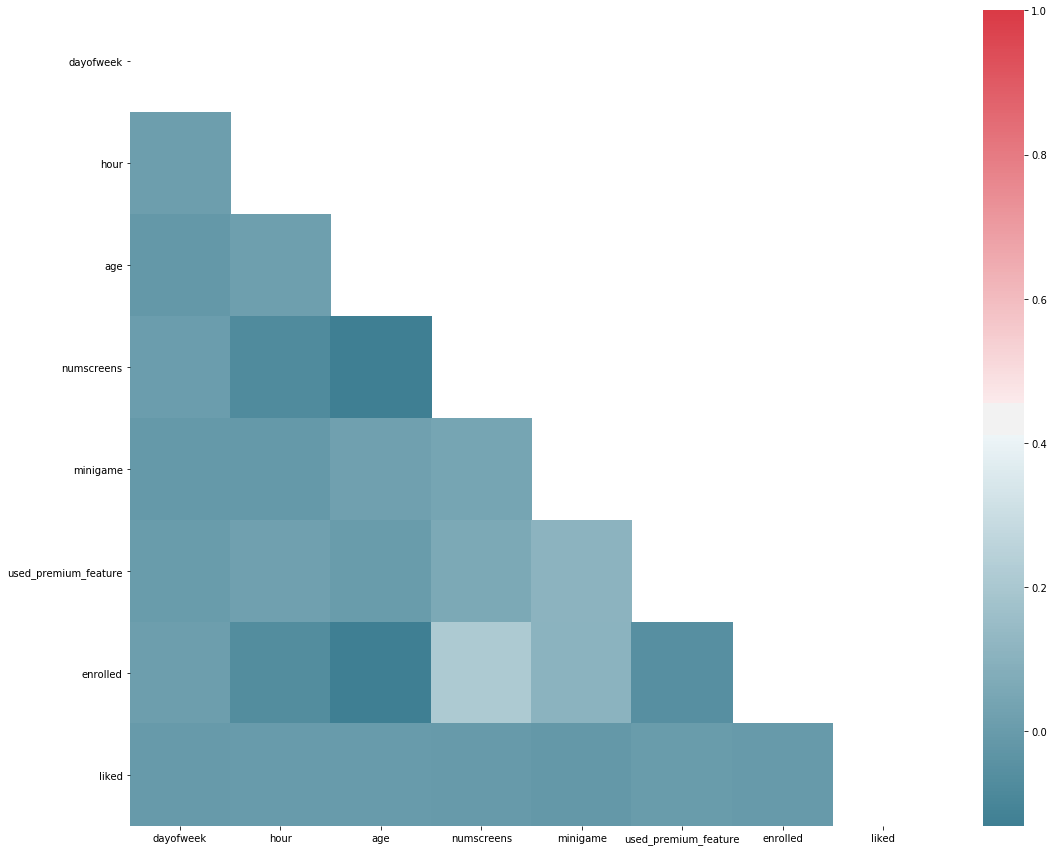

In [37]:
corr=dataset2.corr()
f,ax=plt.subplots(figsize=(18,15))
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask)

In [67]:
dataset.dtypes
dataset['enrolled_date'].dropna()

3        2013-07-05 16:11:49.513
4        2013-02-26 18:56:37.841
5        2013-04-03 09:59:03.291
8        2013-04-27 22:24:54.542
9        2013-04-26 18:31:58.923
10       2013-05-15 21:02:17.200
13       2013-06-18 14:27:42.824
15       2013-04-29 21:10:04.466
16       2013-07-08 16:24:09.052
17       2013-02-11 01:35:03.098
18       2013-05-11 04:29:36.906
19       2013-07-06 18:55:54.215
20       2013-05-26 00:53:03.853
22       2013-06-08 17:13:13.131
23       2013-05-12 02:20:47.731
24       2013-05-21 12:52:53.166
25       2013-06-23 18:38:29.054
26       2013-06-03 16:43:42.971
27       2013-02-24 01:21:26.698
28       2013-05-14 11:49:25.601
30       2013-06-29 00:06:03.199
31       2013-03-27 02:14:14.546
32       2013-02-10 20:48:47.940
33       2013-03-25 04:13:06.243
34       2013-01-21 18:55:08.108
35       2013-06-20 21:59:22.408
37       2013-03-14 16:52:08.723
38       2013-05-05 22:11:41.478
39       2013-05-27 11:07:55.353
40       2013-02-19 06:52:13.465
          

In [78]:
dataset['enrolled_date']=dataset['enrolled_date'].dropna()
dataset['enrolled_date']=[parser.parse(row1_data) for row1_data in dataset['enrolled_date']]


TypeError: Parser must be a string or character stream, not float

In [66]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date                   object
liked                            int64
dtype: object